# TASK 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cleaned_ships_data = pd.read_csv('Cleaned_ships_data.csv')
port_locations = pd.read_csv('Port_locations.csv')
ship_uncleaned = pd.read_csv('ship_uncleaned.csv')

In [3]:
cleaned_ships_data.head() 

,Company_Name,ship_name,built_year,gt,dwt,length,width
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
1,MSC LORETO,Container Ship,2023,236184,240000,399,60
2,MSC FEBE,Container Ship,2019,232618,228149,400,62
3,MSC ARINA,Container Ship,2019,228741,228111,400,61
4,EVER GOVERN,Container Ship,2019,219688,198937,400,59


In [4]:
average_dwt_by_length = cleaned_ships_data.groupby('length')['dwt'].mean().reset_index()

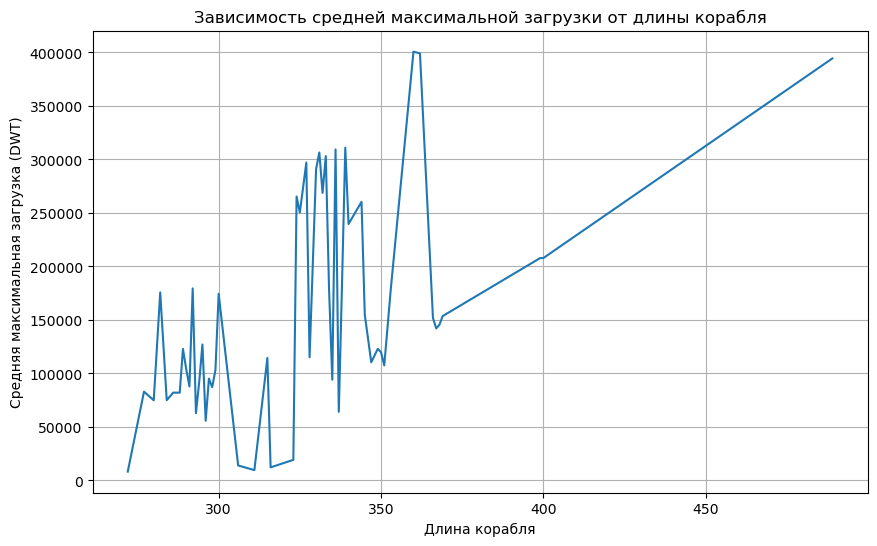

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(average_dwt_by_length['length'], average_dwt_by_length['dwt'])
plt.title('Зависимость средней максимальной загрузки от длины корабля')
plt.xlabel('Длина корабля')
plt.ylabel('Средняя максимальная загрузка (DWT)')
plt.grid(True)
plt.show()


In [6]:
# grouped_data = cleaned_ships_data.groupby('ship_name')
# grouped_data.head()

In [7]:
count_ship_type = {}
valid_ship_type = []

for val in cleaned_ships_data['ship_name']:
    if val not in count_ship_type:
        count_ship_type[val] = 0
    count_ship_type[val] += 1

    
filter = 10
for key, val in count_ship_type.items():
    if val > 10:
        valid_ship_type.append(key)

for index, row in cleaned_ships_data.iterrows():
    if row['ship_name'] not in valid_ship_type:
        cleaned_ships_data.at[index, 'ship_name'] = 'other'

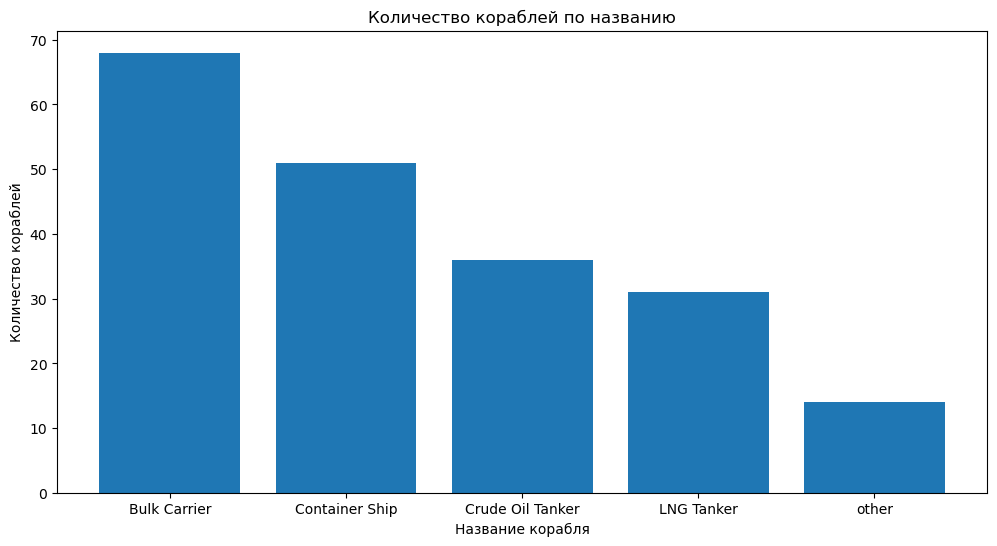

In [8]:
ship_name_counts = cleaned_ships_data.groupby('ship_name').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(ship_name_counts['ship_name'], ship_name_counts['count'])
plt.title('Количество кораблей по названию')
plt.xlabel('Название корабля')
plt.ylabel('Количество кораблей')
plt.show()


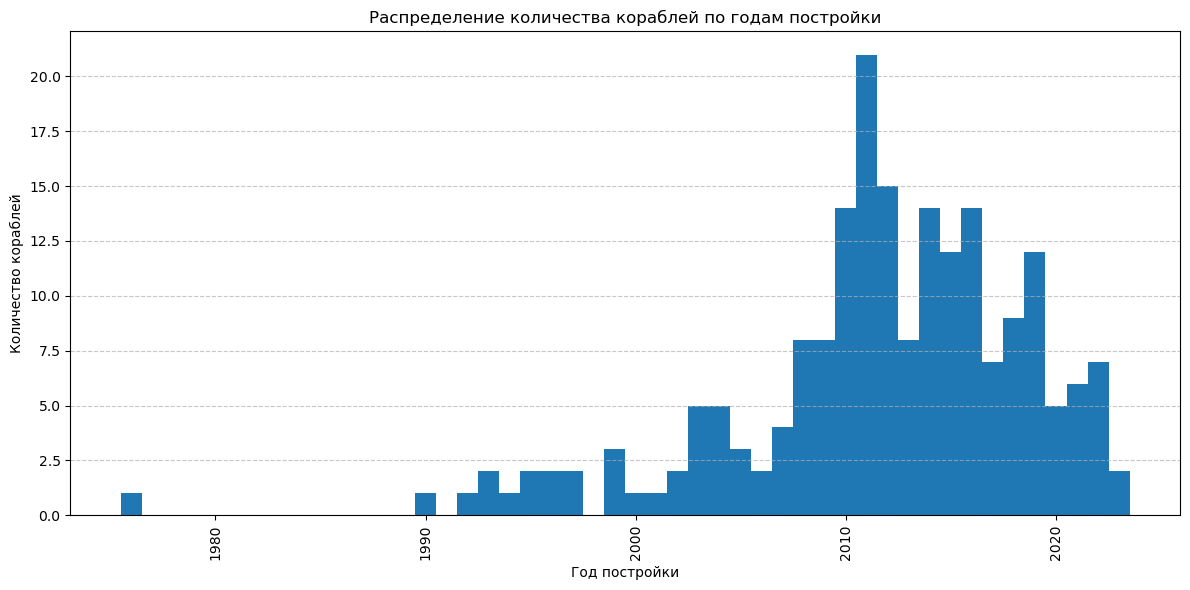

In [9]:
ship_count_by_year = cleaned_ships_data.groupby('built_year').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.bar(ship_count_by_year['built_year'], ship_count_by_year['count'], width=1.0)
plt.title('Распределение количества кораблей по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество кораблей')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()

# Отобразите график
plt.show()

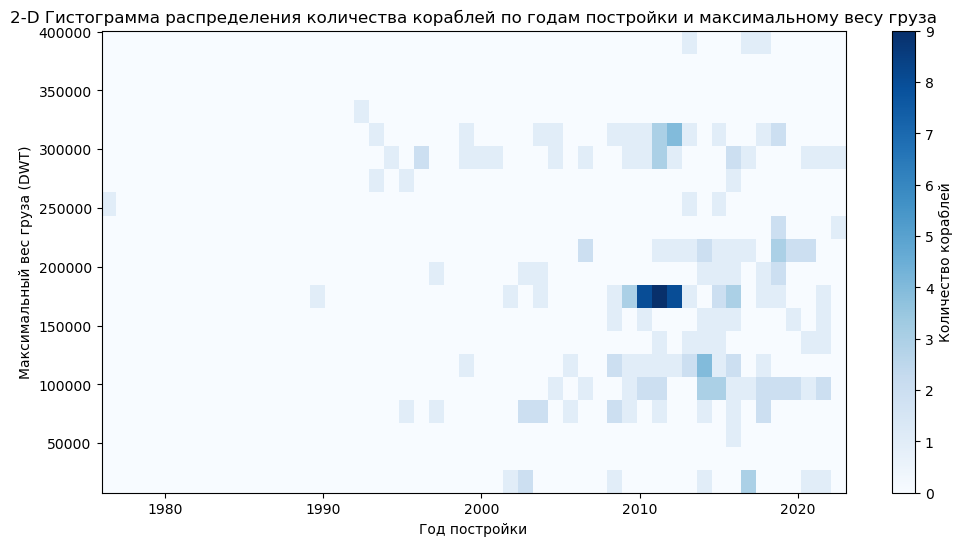

In [10]:
min_dwt = cleaned_ships_data['dwt'].min()
max_dwt = cleaned_ships_data['dwt'].max()

num_bins = 20
#dwt_bins = np.linspace(min_dwt, max_dwt, num_bins)

plt.figure(figsize=(12, 6))
plt.hist2d(cleaned_ships_data['built_year'], cleaned_ships_data['dwt'], bins=[50, 20], cmap='Blues')
plt.colorbar(label='Количество кораблей')
plt.title('2-D Гистограмма распределения количества кораблей по годам постройки и максимальному весу груза')
plt.xlabel('Год постройки')
plt.ylabel('Максимальный вес груза (DWT)')
plt.show()

Text(0.5, 1.0, 'Парная диограмма IRIS')

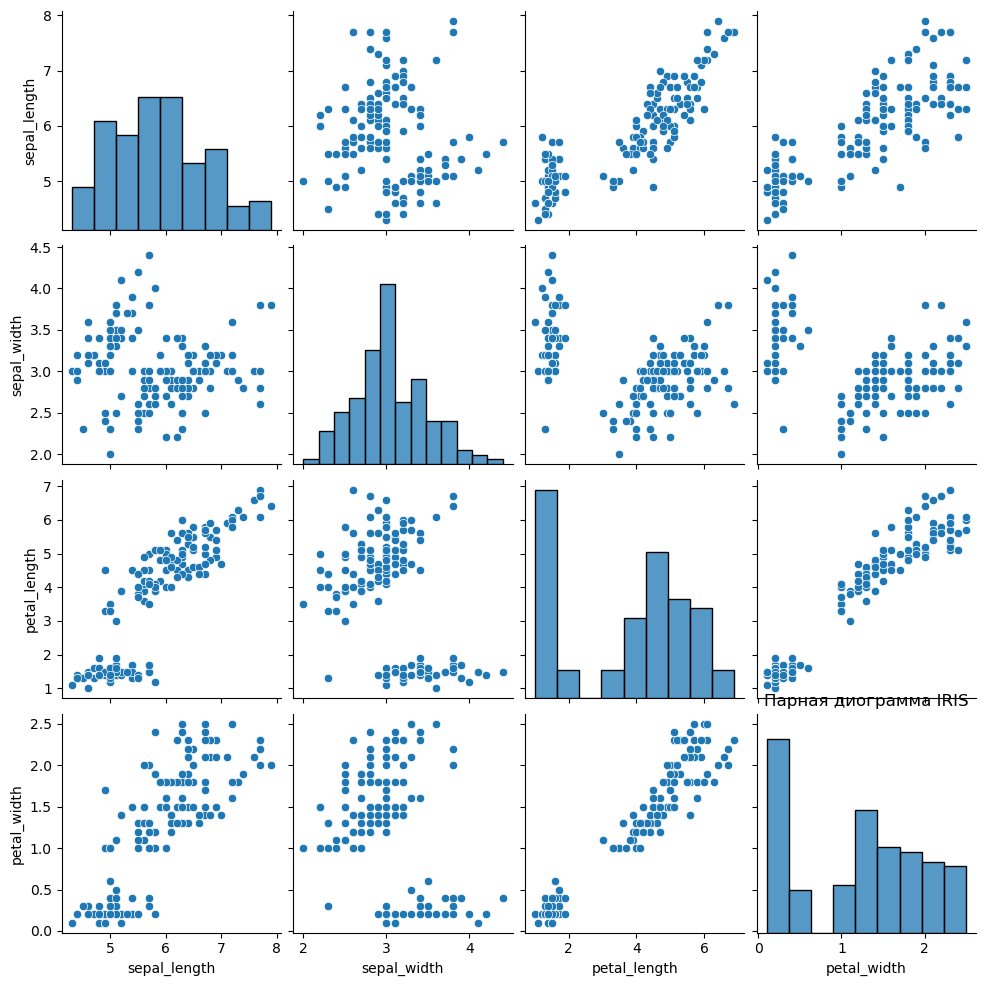

In [27]:
import pandas as pd
import seaborn as sb

iris = pd.read_csv('IRIS.csv')
sb.pairplot(iris)
plt.title("Парная диограмма IRIS")

Text(0.5, 1.0, 'Скрипичная диаграмма для длины чашелистика')

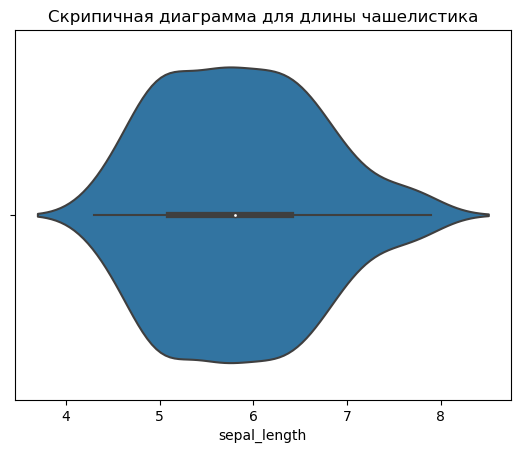

In [26]:
sb.violinplot(x=iris['sepal_length'])
plt.title('Скрипичная диаграмма для длины чашелистика')

Text(0.5, 1.0, 'Скрипичная диаграмма для ширины чашелистика')

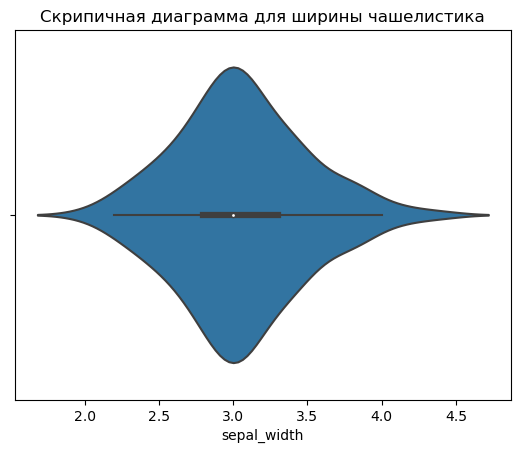

In [25]:
sb.violinplot(x=iris['sepal_width'])
plt.title('Скрипичная диаграмма для ширины чашелистика')

Text(0.5, 1.0, 'Скрипичная диаграмма для длины лепестка')

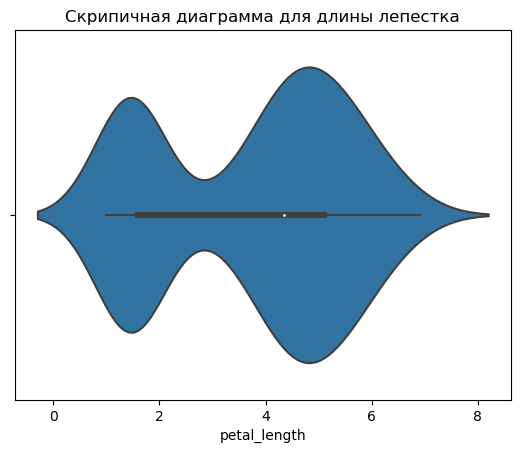

In [22]:
sb.violinplot(x=iris['petal_length'])
plt.title('Скрипичная диаграмма для длины лепестка')

Text(0.5, 1.0, 'Скрипичная диаграмма для ширины лепестка')

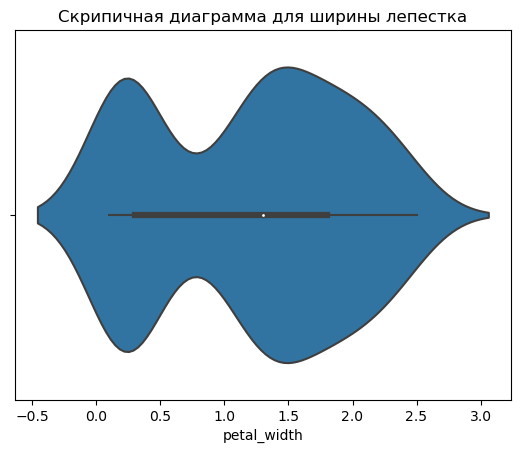

In [23]:
sb.violinplot(x=iris['petal_width'])
plt.title('Скрипичная диаграмма для ширины лепестка')

# TASK 2

In [87]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [18]:
pubg_stats = pd.read_csv('Pubg_Stats.csv')

Text(0, 0.5, 'все убийства')

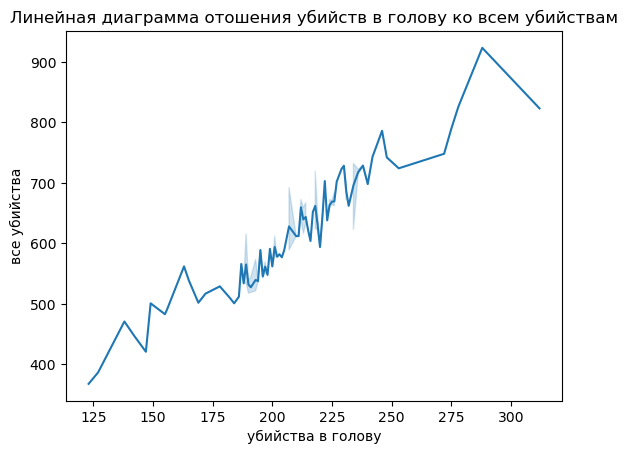

In [24]:
sb.lineplot(pubg_stats, x = 'Headshots', y = 'Kills')
plt.title('Линейная диаграмма отошения убийств в голову ко всем убийствам')
plt.xlabel('убийства в голову')
plt.ylabel('все убийства')

Зависимость убийств в голову ко всем убийствам.
Вывод: Кол-во убийств прямопропорционально убийствам в голову.

Text(0, 0.5, 'Матчи')

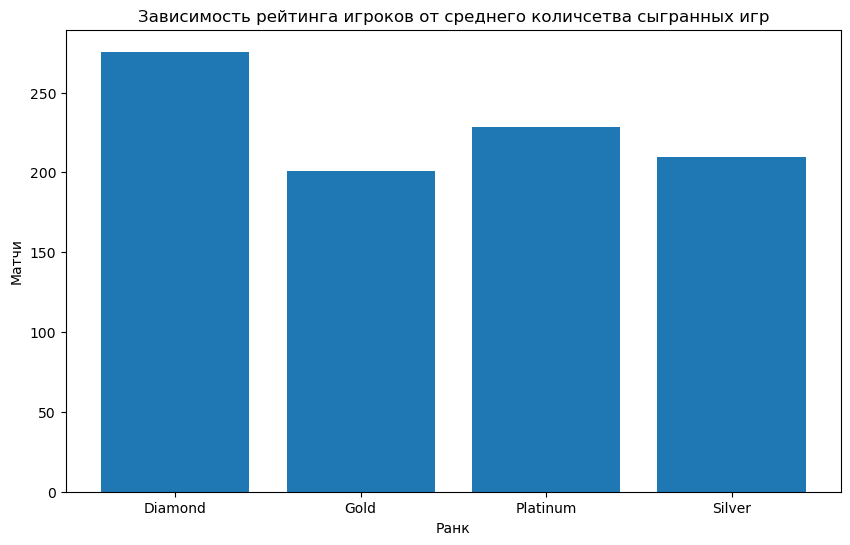

In [54]:
grouped_data = pubg_stats.groupby('Rank')['Matches_Played'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Rank'], grouped_data['Matches_Played'])
plt.title('Среднее количество игр для каждого ранга')
plt.xlabel('Ранк')
plt.ylabel('Матчи')

Среднее количество игр для каждого ранга
Вывод: На рейтинг игрока влияют не только количество сыгранных игр, но и какие-то другие факторы(вероятно скил)

{15: 2, 14: 1, 12: 30, 13: 18, 11: 11}
{12: 1, 8: 1, 9: 10, 10: 40}
{10: 39, 11: 53, 9: 2, 12: 5, 13: 1}
{18: 1, 8: 5, 9: 1}
{'Diamond': {15: 2, 14: 1, 12: 30, 13: 18, 11: 11}, 'Gold': {12: 1, 8: 1, 9: 10, 10: 40}, 'Platinum': {10: 39, 11: 53, 9: 2, 12: 5, 13: 1}, 'Silver': {18: 1, 8: 5, 9: 1}}


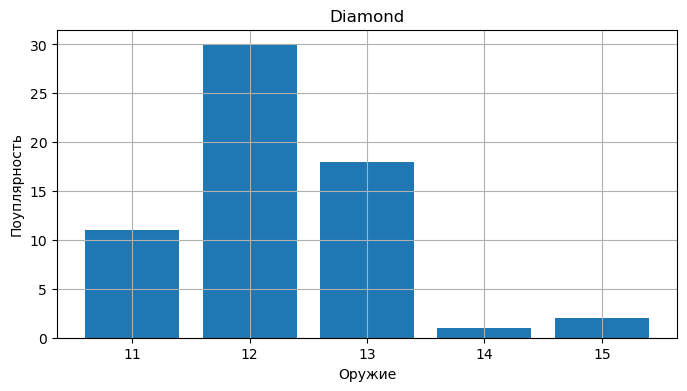

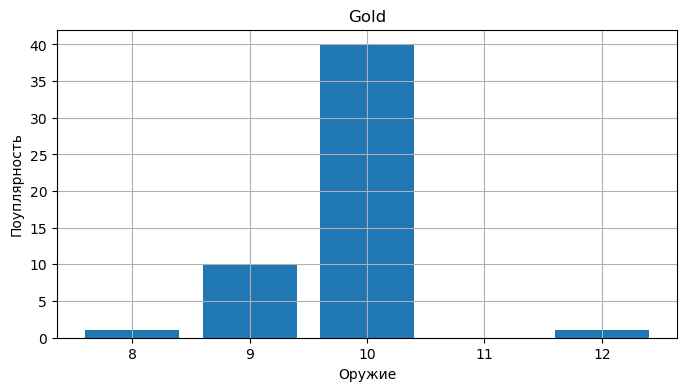

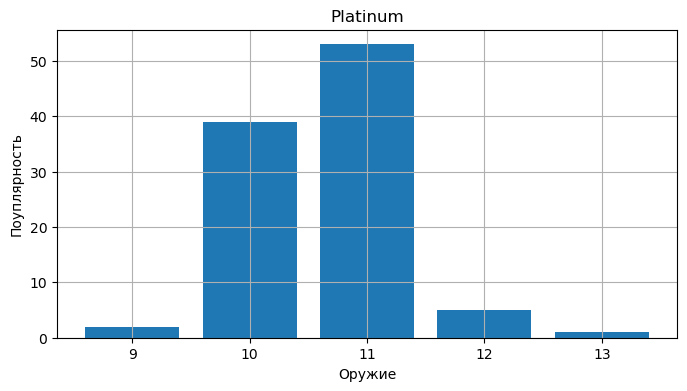

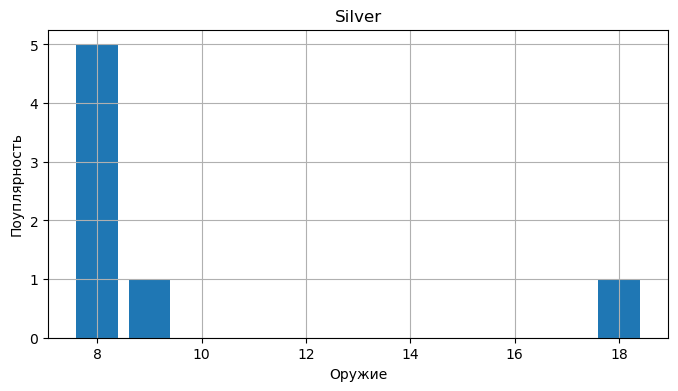

In [100]:
grouped_data = pubg_stats.groupby('Rank')
count_weapon_by_rank = {}
for group_name, group_data in grouped_data:
    count_weapon = {}
    for index, row in group_data.iterrows():
        val = row['Weapons_Used']
        if val not in count_weapon:
            count_weapon[val] = 0
        count_weapon[val] += 1
    print(count_weapon)
    count_weapon_by_rank[group_name] = count_weapon
print(count_weapon_by_rank)

for category, values in count_weapon_by_rank.items():
    plt.figure(figsize=(8, 4))
    plt.bar(values.keys(), values.values())
    plt.title(f'{category}')
    plt.xlabel('Оружие')
    plt.ylabel('Поуплярность')
    plt.grid(True)
    plt.show()







Гистограммы популярности разных пушек на каждом ранге
Вывод: Начиная с платины игроки почти не меняют свои предпочтения в оружии, возможно поэтому некоторые игроки не поднимают ранг выше серебра